In [1]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

from collections import namedtuple
import csv
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML

from digits.data import Env
from digits.explore import *

%matplotlib inline

env = Env('..')
env.assert_ready()
print("ready")

ready


In [2]:
model = 'tf'
variant = 'mnist'
e = explore(env, model, variant, 'test', assert_complete=True)

In [3]:
e.metrics.accuracy()

0.84214285714285719

In [4]:
e.metrics.gold_class_dist()

array([ 0.102     ,  0.11228571,  0.09971429,  0.1045    ,  0.10057143,
        0.08635714,  0.09678571,  0.1015    ,  0.19628571])

In [5]:
e.metrics.pred_class_dist()

array([ 0.10321429,  0.12528571,  0.11114286,  0.10307143,  0.10092857,
        0.08407143,  0.09492857,  0.10342857,  0.17392857])

In [6]:
HTML(viz_table(e.viz.wrong_uncertain))

,index,gold_class,pred_class,p,entropy,proc_image
0,2454,8,6,0.262348,2.050385,
1,1779,0,8,0.221081,2.027171,
2,8165,7,9,0.215087,2.011393,
3,10788,5,0,0.272761,1.994719,
4,12235,0,8,0.241472,1.993680,
5,5565,3,2,0.284073,1.983354,
6,5849,7,2,0.188135,1.983098,
7,13782,9,2,0.284167,1.981301,
8,898,5,1,0.210717,1.980071,
9,4927,9,4,0.262259,1.977685,


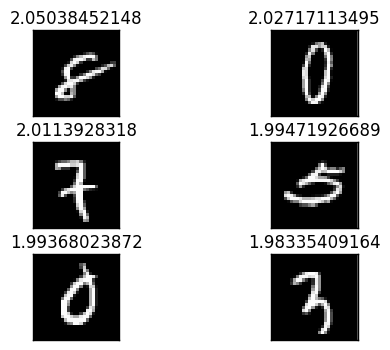

In [7]:
plot_images(e.viz.wrong_uncertain, 3, 2, lambda r: str(r.entropy), lambda r: r.proc_image, show=True)

In [8]:
e.learning_curve.head()

,step,seen,train_acc,train_loss,valid_acc,valid_loss
0,0,0,0.100,3.398970,0.100,3.399540
1,25,5000,0.424,2.174830,0.410,2.182580
2,50,10000,0.748,0.822234,0.768,0.762468
3,75,15000,0.864,0.600157,0.816,0.668129


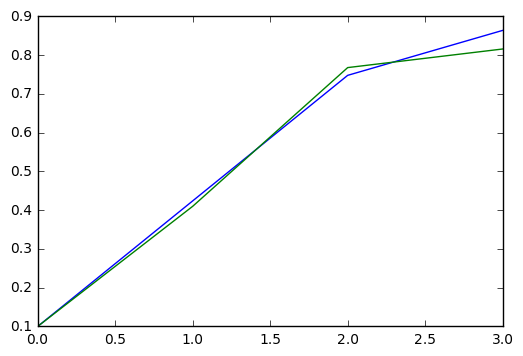

In [9]:
plt.plot(e.learning_curve['train_acc'])
plt.plot(e.learning_curve['valid_acc'])

2
(7, 7, 1, 32)
(32, 7, 7)


/Users/charolastra/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


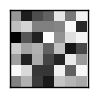

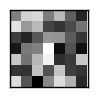

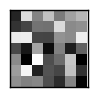

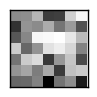

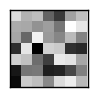

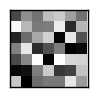

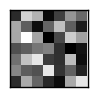

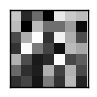

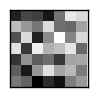

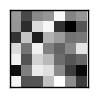

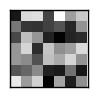

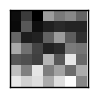

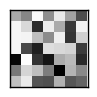

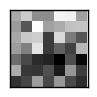

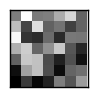

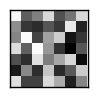

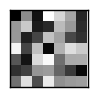

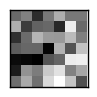

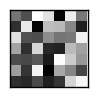

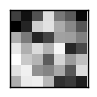

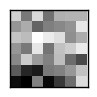

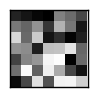

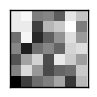

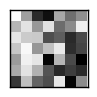

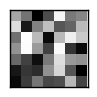

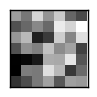

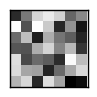

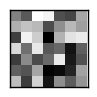

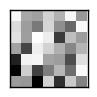

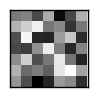

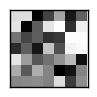

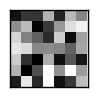

In [11]:
print(len(e.conv_weights[0]))
for ws in e.conv_weights[0]:
    print(ws.shape)
    xs = np.rollaxis(ws, 3)
    xs = xs.reshape(xs.shape[:-1])
    print(xs.shape)
    for i in range(xs.shape[0]):
        x, _ = img_fudge(xs[i])
        plt.subplots(figsize=(1,1), subplot_kw={'xticks': [], 'yticks': []})
        plt.imshow(x, cmap='gray', interpolation='none')
        plt.figure(i+1)
    break
    